# Single-Variable Linear Regression w Matrices

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

DATA_DIR='data/'

### Load Data

In [149]:
dataset = np.loadtxt(DATA_DIR+'Advertising.csv',skiprows=1, delimiter=",", usecols=(1,4))

In [150]:
#Load into Arrays
x = dataset[:,0]
y = dataset[:,1]
print x[:5]
print y[:5]

[ 230.1   44.5   17.2  151.5  180.8]
[ 22.1  10.4   9.3  18.5  12.9]


### Create Matrices

We need to reshape x into columns, append a bias column, and design a Weights matrix that can be dot-product with the features matrix. We have 2 weights (one for b and one for x).

To perform Matrix Multiplication we need to make sure the Columns in features == Rows in weights. 

Features = (200, 2)
Weights = (2, 1)

In [151]:
bias = np.ones(shape=(len(dataset),1))
weights = np.zeros(shape=(2,1))
features = np.reshape(x,newshape=(200,1))
features = np.append(features, bias, axis=1)
targets = y

print "Features (200, 2) ----"
print features[:5]
print "Weights (2, 1) ----"
print weights
print "Targets (200,) ----"
print targets[:5]

Features (200, 2) ----
[[ 230.1    1. ]
 [  44.5    1. ]
 [  17.2    1. ]
 [ 151.5    1. ]
 [ 180.8    1. ]]
Weights (2, 1) ----
[[ 0.]
 [ 0.]]
Targets (200,) ----
[ 22.1  10.4   9.3  18.5  12.9]


### Predict Function

Our predict function multiplies features and weights. Numpy.dot can handle 1D, 2D, or multiple dimension matrices.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

The dimensions of the Matrix Product will equal: Rows of First (features) and Columns of Second (weights). In this case our output would be 200 Rows and 1 Column. We flatten the output to get a 1D array of prediction values that we can compare to the 1D y array.

In [152]:
def predict(features, weights):
    '''
    Takes (200,2) Features and (2,1) Weights matrix
    Returns 1D matrix of predictions
    '''
    return np.dot(features, weights).flatten()

predict(features, weights)[:5]

array([ 0.,  0.,  0.,  0.,  0.])

### Cost Function

The predict function is nice, but for our purposes we don't really need  it. What we need is a cost function so we can find the derivative and start optimizing our weights. 

For our purposes, lets use Mean Squared Error. The formula is:

1/2N * SUM[ (y - (mx + b))^2 ]

* N number of observations
* 1/2N we multiply N by 2 to make our gradient calculation simpler
* SUM[ ] summation after iterating through all data points

In [153]:
def cost_function(features, targets, weights):
    '''
    Takes (200,2) Features and (2,1) Weights matrix
    Returns 1D matrix of predictions
    '''
    predictions = predict(features, weights)

    #Matrix Subtraction - returns 1D matrix
    squared_errors = (targets - predictions)**2

    #Sum values in error matrix
    sum_squared_errors = squared_errors.sum()
    
    #Take the mean of squared errors
    N = len(predictions)
    MSE = sum_squared_errors / (2*N)
    
    return MSE

In [154]:
cost_function(features, targets, weights)

111.858125

### Gradient Descent

To minimize our error we need to calculate the gradient of our cost function. The gradient has two partial derivatives: d/dm and d/db. To find the partial derivatives of the MSE cost function, we need to use the chain rule. A good explanation of the math behind this can be found [here](https://www.youtube.com/watch?v=WnqQrPNYz5Q).

We need the chain rule because (y - (mx + b))^2 is really 2 nested functions, inner = y-mx+b and outer = x^2. More info in our [wiki](http://wiki.fast.ai/index.php/Calculus_for_Deep_Learning#Chain_Rule). The result is the following partial derivatives:

* d/dm = -2x(y - (mx + b))
* d/db = -2(y - (mx + b))

For each sample, we calculate the derivative, divide by N to take the mean, and subtract from the current derivative total we are calculating. The derivative equation returns the direction of steepest ASCENT, so we need to reverse this to reduce our error function. 

In [185]:
def update_weights(features, targets, weights, lr):
    N = len(features)
    x = features[:,0]  #Get 1st column from features
    
    predictions = predict(features, weights)
    
    #d/dm = -2x(y - (mx + b)) = -2x(y - preds)  
    m_deriv_vector = -2*x * (targets - predictions)

    #d/db = -2(y - (mx + b)) = -2(y - preds)
    b_deriv_vector = -2 * (targets - predictions)
    
    # Subtract the mean derivative * learning rate from each weight
    # The derivatives point in the direction of steepest ascent, 
    # so we subtract to move in the opposite direction
    weights[0][0] -= lr * (m_deriv_vector.sum() / float(N))
    weights[1][0] -= lr * (b_deriv_vector.sum() / float(N))
    
    return weights

### Train

In [186]:
def train(features, targets, weights, lr, num_iters):
    cost_history = []
    for i in range(num_iters):
        weights = update_weights(features, targets, weights, lr)
        cost = cost_function(features, targets, weights)
        cost_history.append(cost)
        if i % 10 == 0:
            graph_prediction_line(features[:,0], targets, features, weights)
            print "iter="+str(i) + "  m="+str(round(weights[0][0],5)) + "  b="+str(round(weights[1][0],5)) + "  cost="+str(round(cost,3))
    print "iter="+str(i) + "  m="+str(round(weights[0][0],5)) + "  b="+str(round(weights[1][0],5)) + "  cost="+str(round(cost,3))
    return cost_history

### Visualize

In [187]:
def graph_error(error_history):
    iterations = [i for i in range(1,len(error_history)+1)]
    plt.plot(iterations, error_history)
    plt.title('Error Rate')
    plt.xlabel('Training Iterations')
    plt.ylabel('Mean Squared Error')
    plt.show()
    
def graph_prediction_line(x_arr, y_arr, features, weights):
    predictions = predict(features, weights)
    plt.scatter(x_arr, y_arr)
    plt.plot(x_arr, np.poly1d(np.polyfit(x_arr, predictions, 1) ) (x_arr))
    plt.title('Learned Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

### Run

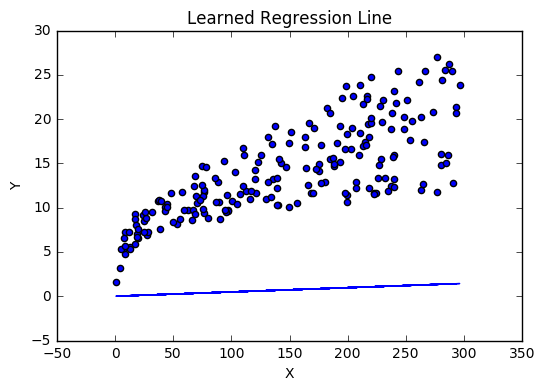

iter=0  m=0.00482  b=3e-05  cost=100.573


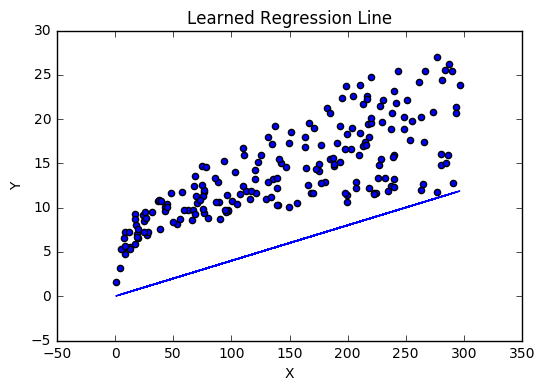

iter=10  m=0.04006  b=0.00024  cost=38.526


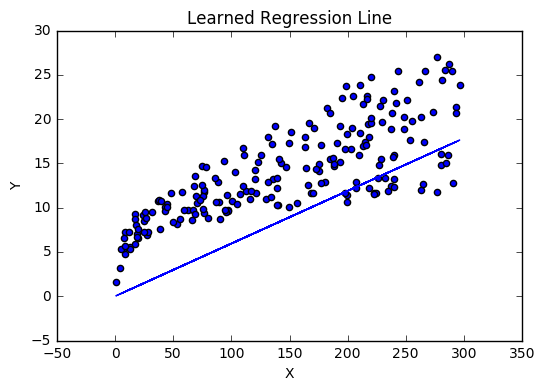

iter=20  m=0.05946  b=0.00038  cost=19.709


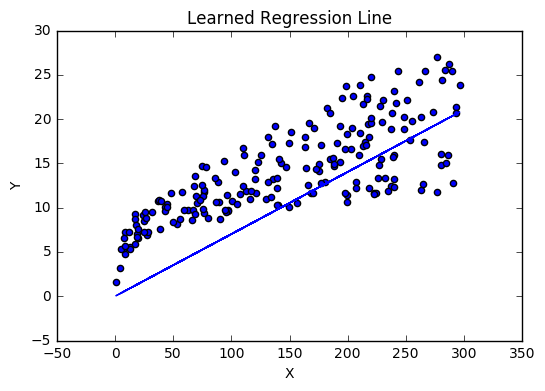

iter=30  m=0.07015  b=0.00047  cost=14.003


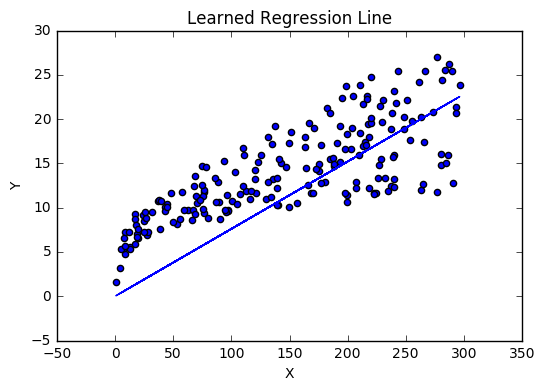

iter=40  m=0.07603  b=0.00053  cost=12.272


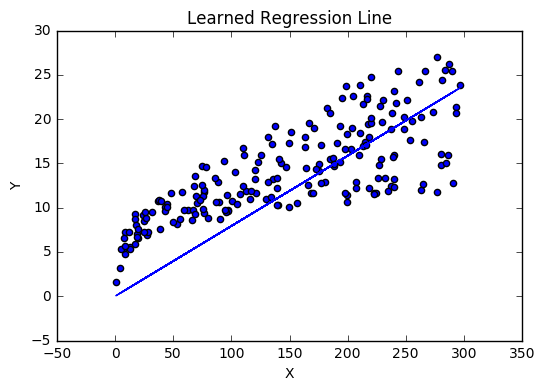

iter=50  m=0.07927  b=0.00058  cost=11.747


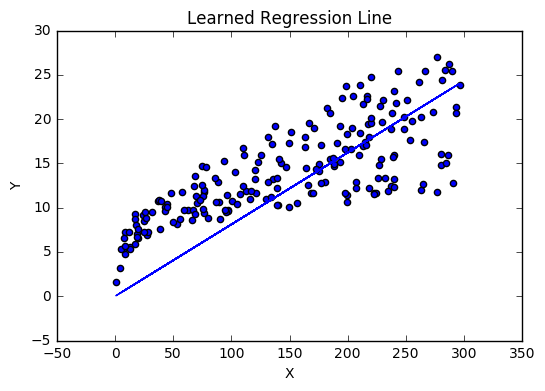

iter=60  m=0.08106  b=0.00063  cost=11.588


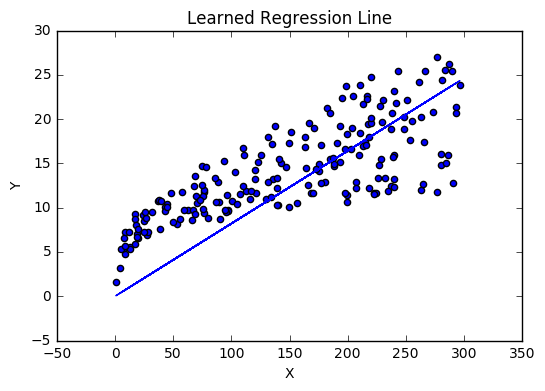

iter=70  m=0.08204  b=0.00067  cost=11.54


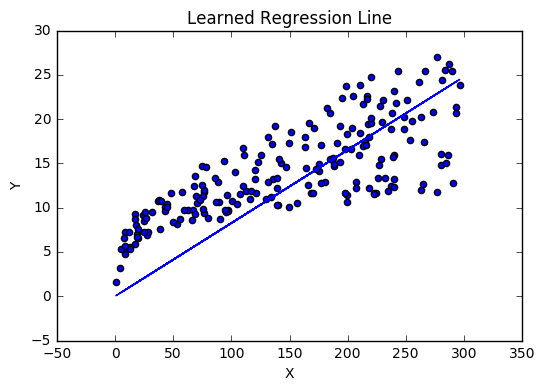

iter=80  m=0.08258  b=0.00071  cost=11.525


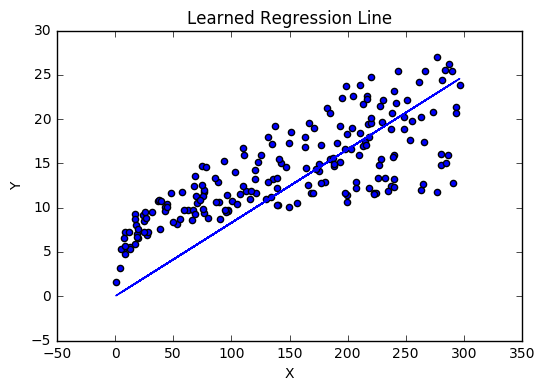

iter=90  m=0.08288  b=0.00075  cost=11.52
iter=99  m=0.08303  b=0.00078  cost=11.519


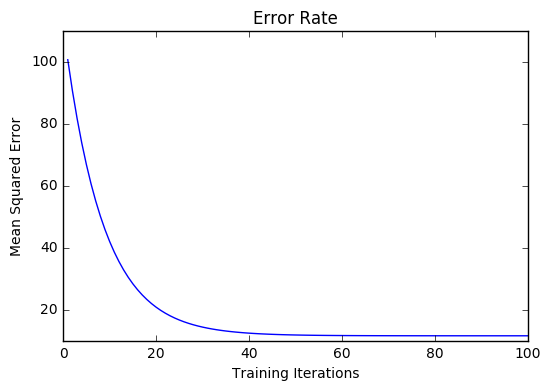

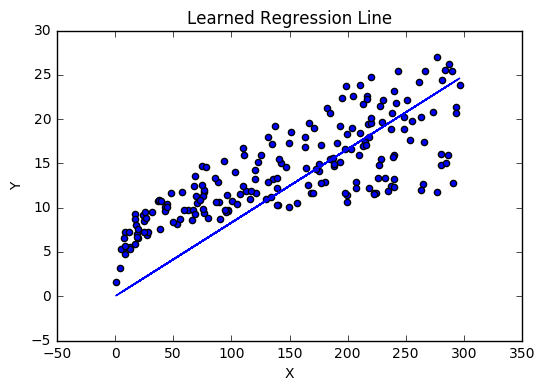

In [188]:
def run():
    #Load Data
    dataset = np.loadtxt(DATA_DIR+'Advertising.csv',skiprows=1, delimiter=",", usecols=(1,4))
    x = dataset[:,0]
    y = dataset[:,1]
    
    #Prepare Data
    bias = np.ones(shape=(len(dataset),1))
    weights = np.zeros(shape=(2,1))
    features = np.reshape(x,newshape=(200,1))
    features = np.append(features, bias, axis=1)
    
    #Set Hyperparameters
    learning_rate = .000001
    iterations = 100
    
    #Capture training history
    cost_history = train(features, targets, weights, learning_rate, iterations)
    
    #Chart cost trend
    graph_error(cost_history)
    graph_prediction_line(x, y, features, weights)

run()